In [1]:
# print messages to terminal
import sys
sys.stdout = open('/dev/stdout', 'w')

In [1]:
from flowpy import Dag
from IPython.display import display
import random
import numpy as np

# make some test data for linear model
x = np.random.randn(10000)
y = [(x_*2)-20 for x_ in x]

# create dag with data nodes
dag = Dag(data={'predictor':x,'data':y})
display(dag)
dag.load_graph('linear_regression.graph')

In [9]:
dag.save_graph('linear_regression.graph')


In [61]:
x = np.random.randn(10000)
y = [(x_*2)-10 for x_ in x]
predictor = x
data = y 

with pymc3.Model() as model:
    var5 = pymc3.Normal('var5')
    var3 = predictor*var5 
    var6 = pymc3.Uniform('var6',lower=-20,upper=0)
    var4 = var3+var6 
    var7 = pymc3.Normal('var7',mu = var4,observed = data,sd=0.01)
    map = pymc3.find_MAP()
    samples = pymc3.sample(100000,njob=3)

Optimization terminated successfully.
         Current function value: -36858.011295
         Iterations: 8
         Function evaluations: 10
         Gradient evaluations: 10


Auto-assigning NUTS sampler...
Initializing NUTS using ADVI...
Average Loss = -36,784:  24%|██▎       | 47148/200000 [00:15<00:50, 3034.68it/s]   
Convergence archived at 47200
Interrupted at 47,200 [23%]: Average Loss = 4.5426e+07
100%|██████████| 100500/100500 [02:15<00:00, 743.80it/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff6c0b1a9b0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7ff6c0a3a9e8>]], dtype=object)

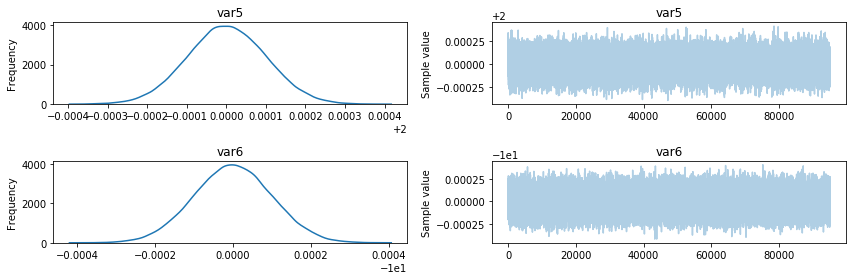

In [62]:
%matplotlib inline
pymc3.traceplot(samples[5000:])

In [64]:
np.mean(samples['var6'])

-10.00000008416429

In [13]:
data

[49.420480374461285,
 53.54816217611407,
 56.10186652713886,
 57.59596413398678,
 62.3843861842545,
 65.44541226427408,
 67.90309648197442,
 70.25146854451111,
 75.56904432684122,
 76.01670720982682,
 78.64193523731335,
 82.61756013412462,
 86.29988884323649,
 88.73531652844733,
 93.32958493457883,
 94.08626193802611,
 98.89613196999278,
 101.23863193919149,
 102.77940994058288,
 108.76218625119542,
 110.5606958875124,
 111.4798412427743,
 115.54075882640083,
 119.65482023946909,
 120.07522094754354,
 124.99882618291961,
 128.92333043516143,
 130.45843593574222,
 132.84443669644818,
 137.21916949095046,
 140.19094152690082,
 145.67711931023985,
 145.77366055862188,
 148.70662846934243,
 151.6937264694902,
 155.39975455055134,
 156.60107808276928,
 160.7933446677733,
 162.86442047365645,
 166.20053604438306,
 168.51257744964101,
 174.01582508394077,
 178.15993605081843,
 179.41116176738973,
 181.96641863602738,
 183.9441270841686,
 189.86978211619817,
 189.59824853087343,
 195.073028291

In [ ]:
{"3": [-0.45302867315385387, -0.00371282997000436, 0.7822458145201566, 1.681400074364513, -0.14379055695292986, 0.512817953189588], "4": [0.15238492804506074, 0.6031925851565928, -0.32884131729900157, -0.34320250935659213, -0.953271853865743, -0.5970006682491421]}